In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tqdm import tqdm
from PIL import Image
from glob import glob

import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

C:\Users\sande\anaconda3\envs\gpuTF\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
IMAGE_SIZE = 224
DATA_DIR = "./DataSet/Training/"

images = sorted(glob(os.path.join(DATA_DIR, "im/*")))
masks = sorted(glob(os.path.join(DATA_DIR, "gt/*")))


def read_image(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.image.decode_bmp(image, channels=0)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    else:
        image = tf.image.decode_bmp(image, channels=3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image/255
    return image

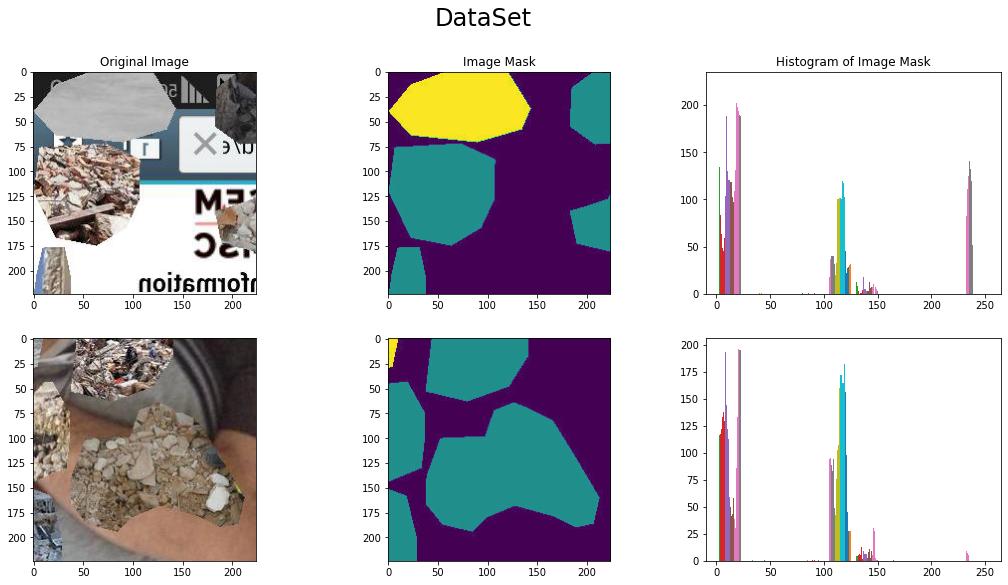

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 9))
axes[0, 0].imshow(read_image(images[0]))
axes[0, 1].imshow(read_image(masks[0], True))
axes[0, 2].hist(tf.reshape(read_image(masks[0], True), (IMAGE_SIZE, IMAGE_SIZE)))

axes[0, 0].set_title("Original Image")
axes[0, 1].set_title("Image Mask")
axes[0, 2].set_title("Histogram of Image Mask")

axes[1, 0].imshow(read_image(images[1000]))
axes[1, 1].imshow(read_image(masks[1000], True))
axes[1, 2].hist(tf.reshape(read_image(masks[1000], True), (IMAGE_SIZE, IMAGE_SIZE)))

fig.suptitle("DataSet", fontsize=24)
plt.show()

In [4]:
mask_ids = next(os.walk("./DataSet/Training/gt/"))[2]

def categorize(value):
    if value < 80:
        return 0
    elif value < 160:
        return 1
    return 2

cat = np.vectorize(categorize)

for n, i in tqdm(enumerate(mask_ids), total=len(mask_ids)):
    image = plt.imread(f"./DataSet/Training/gt/{i}")
    image = cat(image)
    cv2.imwrite(f"./DataSet/Training/gt_categorized/{i}", image)

100%|█████████████████████████████████████████████████████████████████████████████| 7882/7882 [01:04<00:00, 122.83it/s]


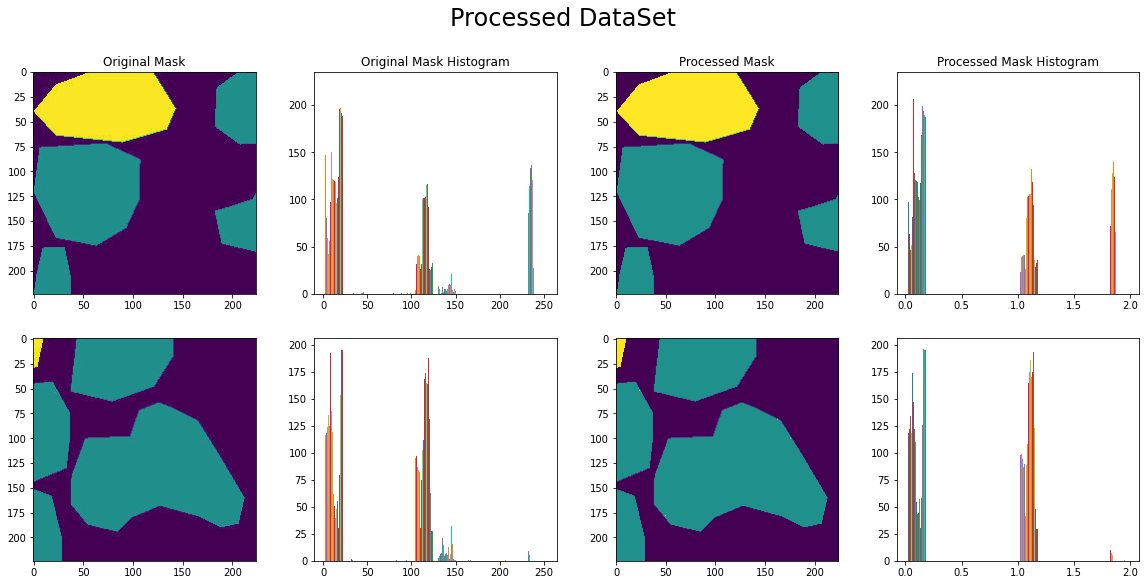

In [5]:
categorized_masks = sorted(glob(os.path.join(DATA_DIR, "gt_categorized/*")))

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 9))
axes[0, 0].imshow(read_image(masks[0], True))
axes[0, 1].hist(tf.reshape(read_image(masks[0], True), (IMAGE_SIZE, IMAGE_SIZE)))
axes[0, 2].imshow(read_image(categorized_masks[0], True))
axes[0, 3].hist(tf.reshape(read_image(categorized_masks[0], True), (IMAGE_SIZE, IMAGE_SIZE)))

axes[0, 0].set_title("Original Mask")
axes[0, 1].set_title("Original Mask Histogram")
axes[0, 2].set_title("Processed Mask")
axes[0, 3].set_title("Processed Mask Histogram")

axes[1, 0].imshow(read_image(masks[1000], True))
axes[1, 1].hist(tf.reshape(read_image(masks[1000], True), (IMAGE_SIZE, IMAGE_SIZE)))
axes[1, 2].imshow(read_image(categorized_masks[1000], True))
axes[1, 3].hist(tf.reshape(read_image(categorized_masks[1000], True), (IMAGE_SIZE, IMAGE_SIZE)))

fig.suptitle("Processed DataSet", fontsize=24)
plt.show()